In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline

In [2]:
#sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [3]:
#sns.color_palette(as_cmap=True)

In [4]:
#df = pd.read_excel('plotting_data.xlsx')
df = pd.read_excel('plotting_data_dia.xlsx')

In [5]:
df

,Mean_diameter,Chloramphenicol,Aspartate,Pyruvate
0,21.23,Vehicle,0,0
1,21.12,Vehicle,0,0
2,21.02,Vehicle,0,0
3,21.42,Vehicle,2,0
4,21.84,Vehicle,2,0
5,21.45,Vehicle,2,0
6,21.46,Vehicle,4,0
7,21.40,Vehicle,4,0
8,21.67,Vehicle,4,0
9,21.76,Vehicle,8,0


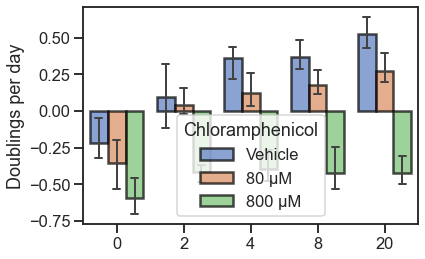

In [35]:
mask = (df['Pyruvate'] == 0)
g1 = sns.barplot(x="Aspartate", y="Proliferation_rate", hue="Chloramphenicol", data=df[mask], capsize=.1, errwidth=2, edgecolor='black', linewidth=2.5, alpha=0.7)

g1.set_ylabel('Doublings per day');
g1.set_xlabel(None);

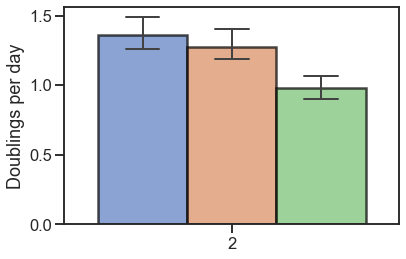

In [36]:
mask = (df['Pyruvate'] != 0)
g2 = sns.barplot(x="Pyruvate", y="Proliferation_rate", hue="Chloramphenicol", data=df[mask], capsize=.1, errwidth=2, edgecolor='black', linewidth=2.5, alpha=0.7)

g2.set_ylabel('Doublings per day');
g2.set_xlabel(None);
g2.legend_.remove()

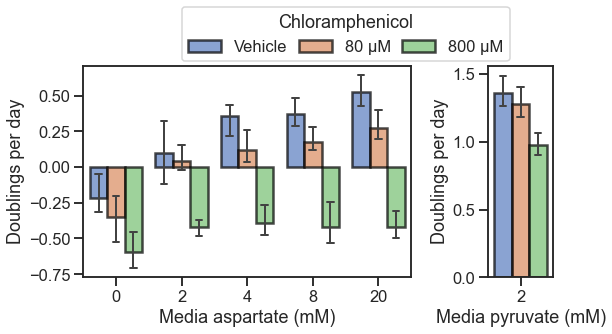

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'width_ratios': [5, 1]})
mask_asp = (df['Pyruvate'] == 0)
g1 = sns.barplot(ax=ax1, x="Aspartate", y="Proliferation_rate", hue="Chloramphenicol", data=df[mask_asp], capsize=.1, errwidth=2, edgecolor='black', linewidth=2.5, alpha=0.7)


g1.set_ylabel('Doublings per day');
g1.set_xlabel('Media aspartate (mM)');


old_legend = g1.legend_
handles = old_legend.legendHandles
labels = [t.get_text() for t in old_legend.get_texts()]
title = old_legend.get_title().get_text()
g1.legend(handles, labels, title=title, bbox_to_anchor=(0.3, 1.02, 1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)



mask_pyr = (df['Pyruvate'] != 0)
g2 = sns.barplot(ax=ax2, x="Pyruvate", y="Proliferation_rate", hue="Chloramphenicol", data=df[mask_pyr], capsize=.1, errwidth=2, edgecolor='black', linewidth=2.5, alpha=0.7)

g2.set_ylabel('Doublings per day');
g2.set_xlabel('Media pyruvate (mM)');
g2.legend_.remove()


fig.tight_layout()
fig.savefig('CytB-Chlor-rescue.pdf', bbox_inches='tight')

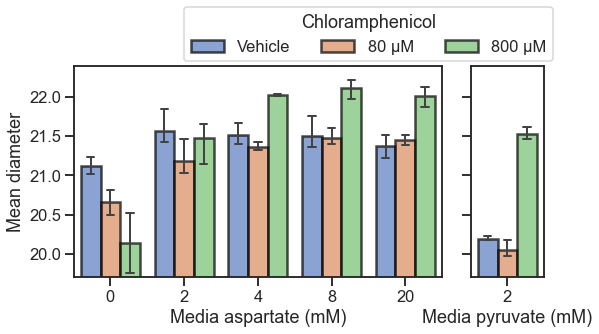

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'width_ratios': [5, 1]}, sharey=True)
mask_asp = (df['Pyruvate'] == 0)
g1 = sns.barplot(ax=ax1, x="Aspartate", y="Mean_diameter", hue="Chloramphenicol", data=df[mask_asp], capsize=.1, errwidth=2, edgecolor='black', linewidth=2.5, alpha=0.7)


g1.set_ylabel('Mean diameter');
g1.set_xlabel('Media aspartate (mM)');
g1.set_ylim(19.7, 22.4);


old_legend = g1.legend_
handles = old_legend.legendHandles
labels = [t.get_text() for t in old_legend.get_texts()]
title = old_legend.get_title().get_text()
g1.legend(handles, labels, title=title, bbox_to_anchor=(0.3, 1.02, 1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)



mask_pyr = (df['Pyruvate'] != 0)
g2 = sns.barplot(ax=ax2, x="Pyruvate", y="Mean_diameter", hue="Chloramphenicol", data=df[mask_pyr], capsize=.1, errwidth=2, edgecolor='black', linewidth=2.5, alpha=0.7)

g2.set_ylabel('');
g2.set_xlabel('Media pyruvate (mM)');
g2.legend_.remove()


fig.tight_layout()
fig.savefig('CytB-Chlor-rescue_dia.pdf', bbox_inches='tight')